# Лабораторная работа №8
# Классификация (линейный дискриминантный анализ, метод опорных векторов)

## Загрузка данных

In [74]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = pd.read_csv('iris.data',header=None)

X = data.iloc[:,:4].to_numpy()
labels = data.iloc[:,4].to_numpy()

le = preprocessing.LabelEncoder()
Y = le.fit_transform(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)


## Линейный дискриминантный анализ


Проведем классификацию наблюдений используя [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5,
random_state=0)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum()) #количество наблюдений, который были неправильно определены


3


Опишите атрибуты и параметры данного классификатора


TODO

Используя функцию score() выведите точность классификации

In [76]:
clf.score(X_test, y_test)

0.96

 Постройте график зависимости неправильно классифицированных наблюдений и
точности классификации от размера тестовой выборки. Размер тестовой выборки
изменяйте от 0.05 до 0.95 с шагом 0.05. Параметр random_state сделайте равным
номеру своей зачетной книжки. Обоснуйте полученные результаты.


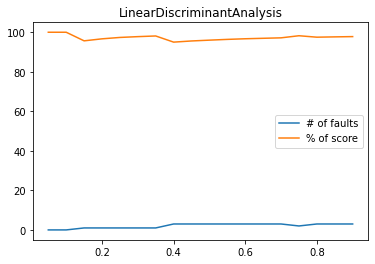

In [77]:
def estimate_clf(clf):
    size_range = np.arange(0.05, 0.95, 0.05)
    test_results = []

    for size in size_range:
        X_train, X_test, y_train, y_test =\
            train_test_split(X, Y, test_size=size, random_state=630706)

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        fault = (y_test != y_pred).sum()
        score = clf.score(X_test, y_test) * 100

        test_results.append([size, fault, score])

    return np.array(test_results)


def show_result(clf, results, param = ''):
    plt.plot(results[:,0], results[:,1], label='# of faults')
    plt.plot(results[:,0], results[:,2], label='% of score')
    plt.title(clf.__name__)
    plt.legend()
    plt.show()


test_results = estimate_clf(LinearDiscriminantAnalysis())
show_result(LinearDiscriminantAnalysis, test_results)

Опишите для чего нужна функция transform? Примените ее, и визуализируйте
результаты.


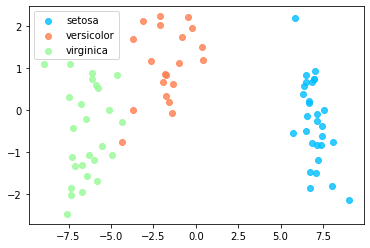

In [78]:
data_transformed = clf.transform(X_train)

labels = ['setosa', 'versicolor', 'virginica']

plt.figure()

colors = ['deepskyblue', 'coral', 'palegreen']
lw = 2

for color, i, label_ in zip(colors, [0, 1, 2], labels):
    plt.scatter(data_transformed[y_train == i, 0], data_transformed[y_train == i, 1], alpha=.8, color=color,
                label=label_)
plt.legend(loc='best', shadow=False, scatterpoints=1)

 Исследуйте работу классификатор при различных параметрах solver, shrinkage.


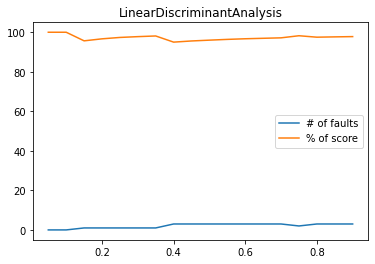

/home/gikari/.local/lib/python3.8/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "


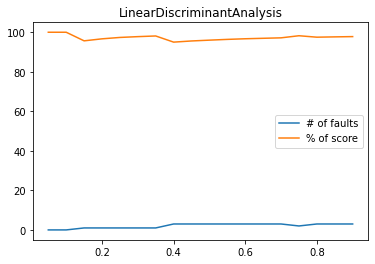

/home/gikari/.local/lib/python3.8/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "


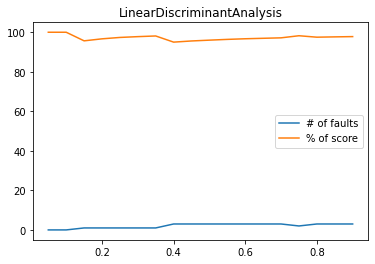

In [79]:
for solver in ['svd', 'lsqr', 'eigen']:
    test_results = estimate_clf(LinearDiscriminantAnalysis(solver=solver))
    show_result(LinearDiscriminantAnalysis, test_results)

/home/gikari/.local/lib/python3.8/site-packages/sklearn/covariance/_shrunk_covariance.py:203: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/gikari/.local/lib/python3.8/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "


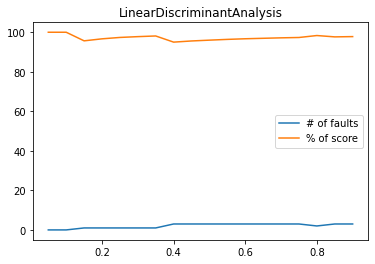

/home/gikari/.local/lib/python3.8/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "


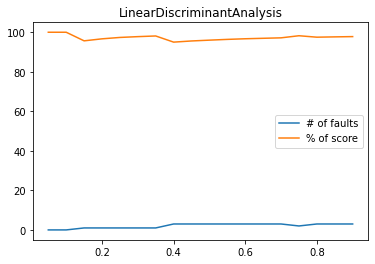

In [80]:
for shrinkage in ['auto', None]:
    test_results = estimate_clf(LinearDiscriminantAnalysis(shrinkage=shrinkage, solver='lsqr'))
    show_result(LinearDiscriminantAnalysis, test_results)

 Задайте априорную вероятность классу с номером 1 равную 0.7, остальным классам
задайте равные априорные вероятности. Как это сказалось на результате?


In [81]:
priors = np.zeros(len(set(labels)))
priors[0] = 0.7
priors[1:] = 0.3 / (len(set(labels)) - 1)
priors

array([0.7 , 0.15, 0.15])

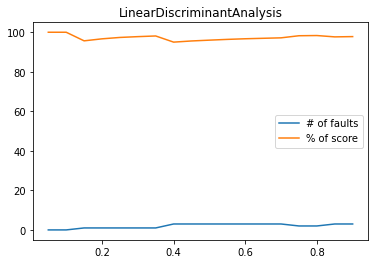

In [82]:
test_results = estimate_clf(LinearDiscriminantAnalysis(priors=priors))
show_result(LinearDiscriminantAnalysis, test_results)

TODO

## Метод опорных векторов


 Классификацию при [SVM](https://scikit-learn.org/stable/modules/svm.html#classification) на тех же данных


In [83]:
clf = svm.SVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum())
print(clf.score(X, Y))

4
0.9533333333333334


Используя функцию score() выведите точность классификации


In [84]:
clf.score(X_test, y_test)

0.9466666666666667

Выведите следующую информацию


In [85]:
print(clf.support_vectors_)
print(clf.support_)
print(clf.n_support_)

[[4.5 2.3 1.3 0.3]
 [5.4 3.9 1.7 0.4]
 [5.1 3.3 1.7 0.5]
 [5.  3.  1.6 0.2]
 [5.1 2.5 3.  1.1]
 [6.2 2.2 4.5 1.5]
 [5.7 2.9 4.2 1.3]
 [5.7 2.8 4.5 1.3]
 [6.6 3.  4.4 1.4]
 [6.4 2.9 4.3 1.3]
 [4.9 2.4 3.3 1. ]
 [6.7 3.1 4.4 1.4]
 [5.7 2.6 3.5 1. ]
 [6.3 2.5 4.9 1.5]
 [6.7 3.  5.  1.7]
 [5.5 2.4 3.7 1. ]
 [6.6 2.9 4.6 1.3]
 [5.6 3.  4.1 1.3]
 [5.9 3.2 4.8 1.8]
 [6.3 2.3 4.4 1.3]
 [5.9 3.  5.1 1.8]
 [6.4 2.8 5.6 2.1]
 [6.5 3.2 5.1 2. ]
 [6.2 3.4 5.4 2.3]
 [5.7 2.5 5.  2. ]
 [6.9 3.1 5.4 2.1]
 [7.2 3.  5.8 1.6]
 [7.9 3.8 6.4 2. ]
 [6.  3.  4.8 1.8]
 [6.4 3.2 5.3 2.3]
 [6.7 3.  5.2 2.3]
 [5.8 2.7 5.1 1.9]
 [6.3 2.9 5.6 1.8]]
[16 26 36 59  2  4  6 33 34 37 40 42 54 57 58 60 64 65 66 67  1 11 14 17
 19 20 23 41 44 55 56 62 71]
[ 4 16 13]


Объясните, что отображают данные параметры, от чего зависят.


TODO

Постройте график зависимости неправильно классифицированных наблюдений и
точности классификации от размера тестовой выборки. Размер тестовой выборки
изменяйте от 0.05 до 0.95 с шагом 0.05. Параметр random_state сделайте равным
номеру своей зачетной книжки. Обоснуйте полученные результаты.


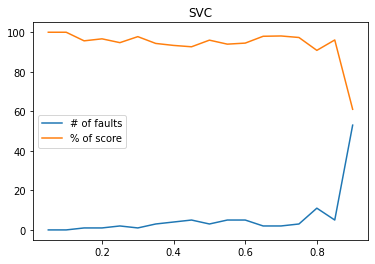

In [86]:
test_results = estimate_clf(svm.SVC())
show_result(svm.SVC, test_results)

Исследуйте работу метода опорных векторов при различных значениях kernel, degree,
max_iter


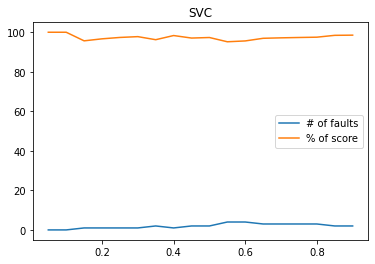

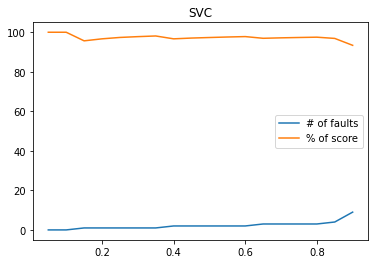

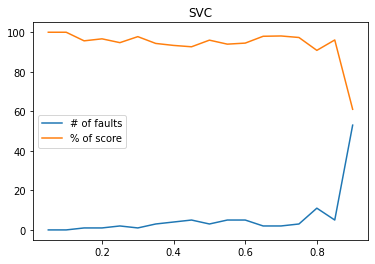

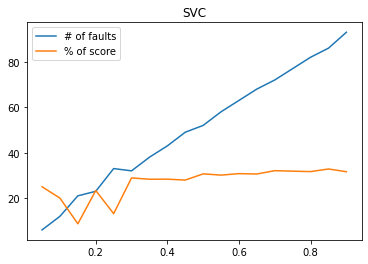

In [87]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    test_results = estimate_clf(svm.SVC(kernel=kernel))
    show_result(svm.SVC, test_results)

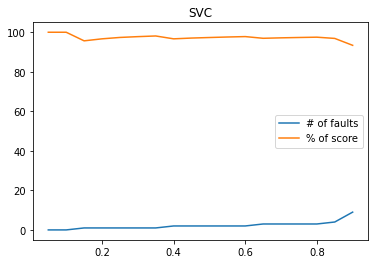

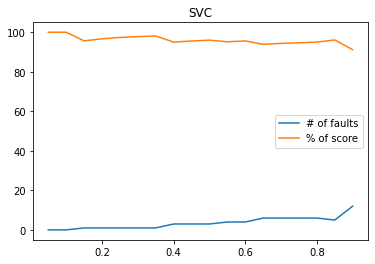

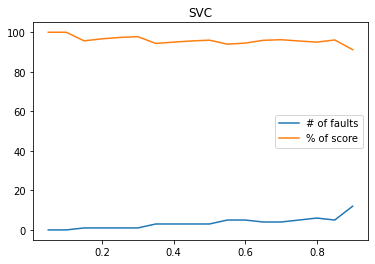

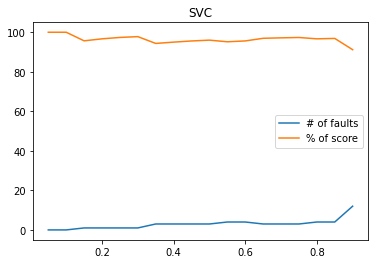

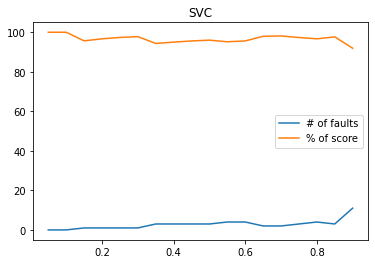

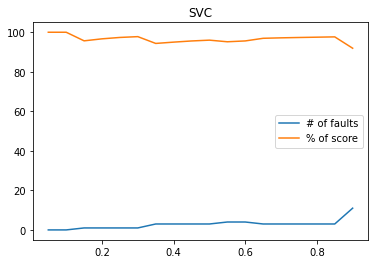

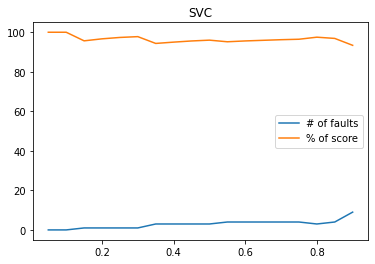

In [88]:
for degree in range(3, 10):
    test_results = estimate_clf(svm.SVC(kernel='poly', degree=degree))
    show_result(svm.SVC, test_results)

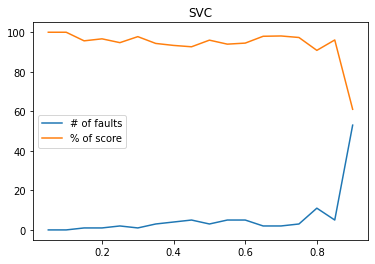

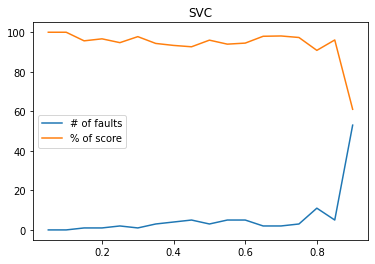

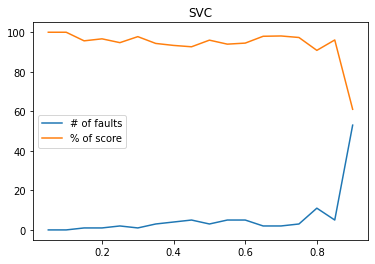

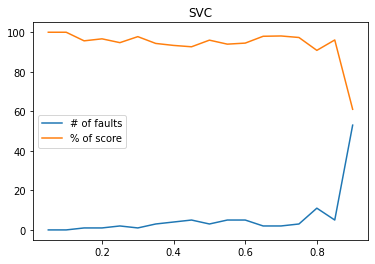

In [89]:
for max_iter in [-1, 40, 200, 300]:
    test_results = estimate_clf(svm.SVC(max_iter=max_iter))
    show_result(svm.SVC, test_results)

Проведите исследование для методов [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC) и [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC). В чем их отличие от SVC


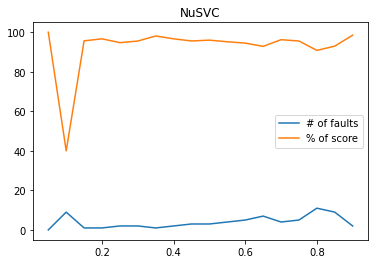

/home/gikari/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/gikari/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/gikari/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/gikari/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/gikari/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase

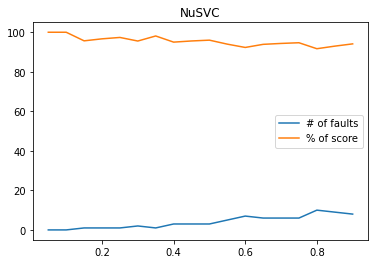

In [90]:
test_results = estimate_clf(svm.NuSVC(nu=0.01))
show_result(svc, test_results)
    
test_results = estimate_clf(svm.LinearSVC())
show_result(svc, test_results)

TODO